<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine2/blob/main/WOMAC_New_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")
d=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.31_Final_Original.csv")


In [54]:
!pip install smogn
import smogn
dataset = smogn.smoter(
    
    data = d, 
    y = "WOMAC_total"
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


r_index: 100%|##########| 2/2 [00:00<00:00,  2.97it/s]


In [55]:
X = dataset.iloc[:,17:]
y = dataset.iloc[:, 9]

In [56]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)



featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


number_of_feat=int(input("Number Of Best Features: "))


imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21 22 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Number Of Best Features: 50
              Specs      Score
777         TA-G-92  13.209328
776         TA-G-91  12.770648
778         TA-G-93  12.269450
784         TA-G-99  12.008091
785        TA-G-100  12.008072
779         TA-G-94  11.059943
775         TA-G-90  10.620536
783         TA-G-98  10.077505
780         TA-G-95   9.237172
782         TA-G-97   8.569117
781         TA-G-96   8.257822
774         TA-G-89   8.066573
791  Swing_CCI_TA-G   6.817581
773         TA-G-88   6.254869
685          TA-G-0   5.306077
772         TA-G-87   5.003849
686          TA-G-1   4.904858
758         TA-G-73   4.652880
759         TA-G-74   4.633516
687          TA-G-2   4.269759
571        TA-RF-88   4.201363
760         TA-G-75   4.197395
771         TA-G-86   4.097113
570        TA-RF-87   4.020726
572        TA-RF-89   3.999637
147             G68   3.876700
688          TA-G-3   3.737074
146             G67   3.723097
573        TA-RF-90   3.683091
148             G69   3.625478
761        

In [57]:
index = 0 #enter the serial of features

X_new = dataset[[imp.iloc[:,0:1].values[index][0]]]
y_new = dataset.iloc[:, 9]

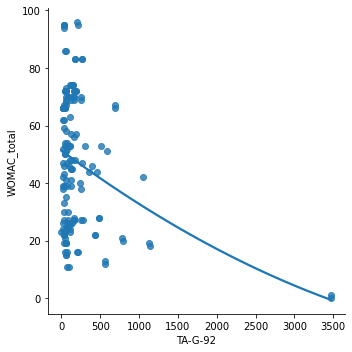

In [58]:
sns.lmplot(x = imp.iloc[:,0:1].values[index][0], y ="WOMAC_total", data = dataset, order = 2, ci = None)

In [59]:
X_train=X_new.iloc[:120,:]  
X_test=X_new.iloc[120:,:]
y_train=y_new.iloc[:120]
y_test=y_new.iloc[120:]

In [60]:

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train) 


r_2 = model.score(X_test, y_test)
print('coefficient of determination (r2):', r_2)


print('intercept:', model.intercept_)

print('slope:', model.coef_) 

y_pred = model.predict(X_test)
print('Predicted response:', y_pred, sep='\n')


coefficient of determination (r2): -0.6224611080466531
intercept: 54.68919744856928
slope: [-0.01601888]
Predicted response:
[54.4757271  53.96866278 53.29407762 52.11955404 50.44459216 54.22970884
 -0.96457769 53.61594286 45.65646511 53.82456239 51.29122253 53.63688445
 54.14596782 36.37663537 53.68522646 41.94608026 53.9643726  47.69484111
 54.15167849 54.25024782 54.68919745 53.59163197 52.90678203 53.62472461
 52.64337409 52.11610297 54.30305396 50.2719098  53.28325207 52.02911748
 46.97671465]


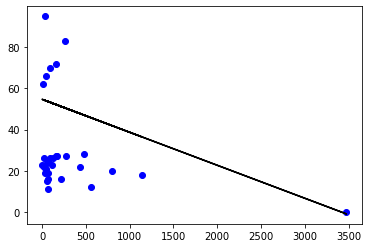

In [61]:

plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [62]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 27.26155624192931
MSE: 830.31853038917
RMSE: 28.815248227096188
